In [ ]:
##importing dependencies
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#code to see
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
FILE_PATH = '/content/drive/MyDrive/hypercarge_sessions.parquet'
df = pd.read_parquet(FILE_PATH)

In [ ]:
df.sample(5)

,serialNumber,gpsLat,gpsLong,locationStreet,locationZipCode,locationTown,locationProvince,locationCountry,locationUpdateNote,endClientName,distributorName,corporationName,operatorName,lendeeName,evId,type,physicalPosition,cableLength,producer,chargingSessionGraphData,stackErrors,chargingSessionErrors,stackOszis,hasOcmfData,session.averageAmp,session.averagePinTempMinus,session.averagePinTempPlus,session.averagePower,session.analysisComment,session.analysisTimestamp,session.analyzedBy,session.errorCode,session.creationTime,session.carChargeParameterId,session.car,session.distributorName,session.distributorId,session.end,session.evId,session.falsePositive,session.hasOcmfData,session.hycErrorcode,session.isNoStopTracked,session.logRequestExecuted,session.logRequestResult,session.meterStart,session.meterStop,session.physicalPosition,session.peakAmp,session.peakPinTempMinus,session.peakPinTempPlus,session.peakPower,session.producer,session.reason,session.stackErrorCount,session.stackErrorsArrayText,session.start,session.startU,session.sessionErrorsDb,session.sessionLiveViewEnabled,session.serialNumber,session.socStart,session.socStop,session.softwareVersion,session.chargingSessionId,session.stopU,session.timestampUncertain,session.type,session.position,session.maxPinDelta,session.transactionIdNew,carChargeParameter.carChargeParameterId,carChargeParameter.voltage,carChargeParameter.maxPower,carChargeParameter.current,carChargeParameter.car,carChargeParameter.excludeFromStatistics,carChargeParameter.batteryCapacity,carChargeParameter
1128,22BZ5328B,41.686013,13.187509,A1,03012,Provincia di Frosinone,Lazio,Italy,,None,Free To X S.p.A.,Free To X S.p.A.,None,None,103679926054,CCS2_400,1.0,500,None,"[{'currentEv': 5.0, 'currentEvse': 0.0, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],False,None,None,None,None,None,None,None,None,2024-07-17T13:42:18.509782+00:00,1985.0,None,None,None,2024-07-17T14:21:02+00:00,103679926054,False,None,None,False,True,Success,103243232,103286408,None,None,None,None,None,None,Local,None,None,2024-07-17T13:42:17+00:00,None,None,None,,34,89,hyc_v1.8.3,69736513,None,False,None,1,None,None,1985.0,430.0,129000.0,300.0,Mercedes EQV / EQB,False,NaN,None
9911,24BZ1725B,50.000000,-25.000000,None,None,None,None,None,None,None,Free To X S.p.A.,Free To X S.p.A.,None,None,13630515343051,CCS2_400,4.0,500,None,"[{'currentEv': 1.7, 'currentEvse': 1.0, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],False,None,None,None,None,None,None,None,None,2024-08-15T22:09:21.828179+00:00,3117.0,None,None,None,2024-08-15T22:52:06+00:00,13630515343051,False,None,None,False,True,Success,350149,393608,None,None,None,None,None,None,Local,None,None,2024-08-15T22:09:20+00:00,None,None,None,,33,99,hyc_v1.8.3,74452549,None,False,None,2,None,None,3117.0,347.0,250000.0,500.0,BMW iX1,False,NaN,None
5179,24BZ4453D,NaN,NaN,None,None,None,None,None,None,None,Free To X S.p.A.,Free To X S.p.A.,None,None,103679899713,CCS2_400,1.0,500,None,"[{'currentEv': 6.0, 'currentEvse': 0.7, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],False,None,None,None,None,None,None,None,None,2024-07-30T11:29:24.438476+00:00,927.0,None,None,None,2024-07-30T11:58:18+00:00,103679899713,False,None,None,False,True,Success,875131,885537,None,None,None,None,None,None,Local,None,None,2024-07-30T11:29:23+00:00,None,None,None,,0,0,hyc_v2.0.0-MS2.1,71843272,None,False,None,1,None,None,927.0,460.0,92000.0,200.0,unknown,False,NaN,None
973,22BZ0667B,45.461680,9.276506,Viale Enrico Forlanini 1,20134,Milano,Lombardia,Italy,Airport Linate,None,Free To X S.p.A.,Free To X S.p.A.,None,None,259921967158997,CCS2_400,1.0,500,None,"[{'currentEv': 1.6, 'currentEvse': 2.1, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],False,None,None,None,None,None,None,None,None,2024-07-15T19:28:16.40449+00:00,1144.0,None,None,None,2024-07-15T20:21:37+00:00,259921967158997,False,None,None,False,True,Success,79130776,79176320,None

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13442 entries, 0 to 13441
Data columns (total 79 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   serialNumber                              13442 non-null  object 
 1   gpsLat                                    12978 non-null  float64
 2   gpsLong                                   12978 non-null  float64
 3   locationStreet                            8931 non-null   object 
 4   locationZipCode                           8931 non-null   object 
 5   locationTown                              8931 non-null   object 
 6   locationProvince                          8931 non-null   object 
 7   locationCountry                           12235 non-null  object 
 8   locationUpdateNote                        7745 non-null   object 
 9   endClientName                             0 non-null      object 
 10  distributorName                        

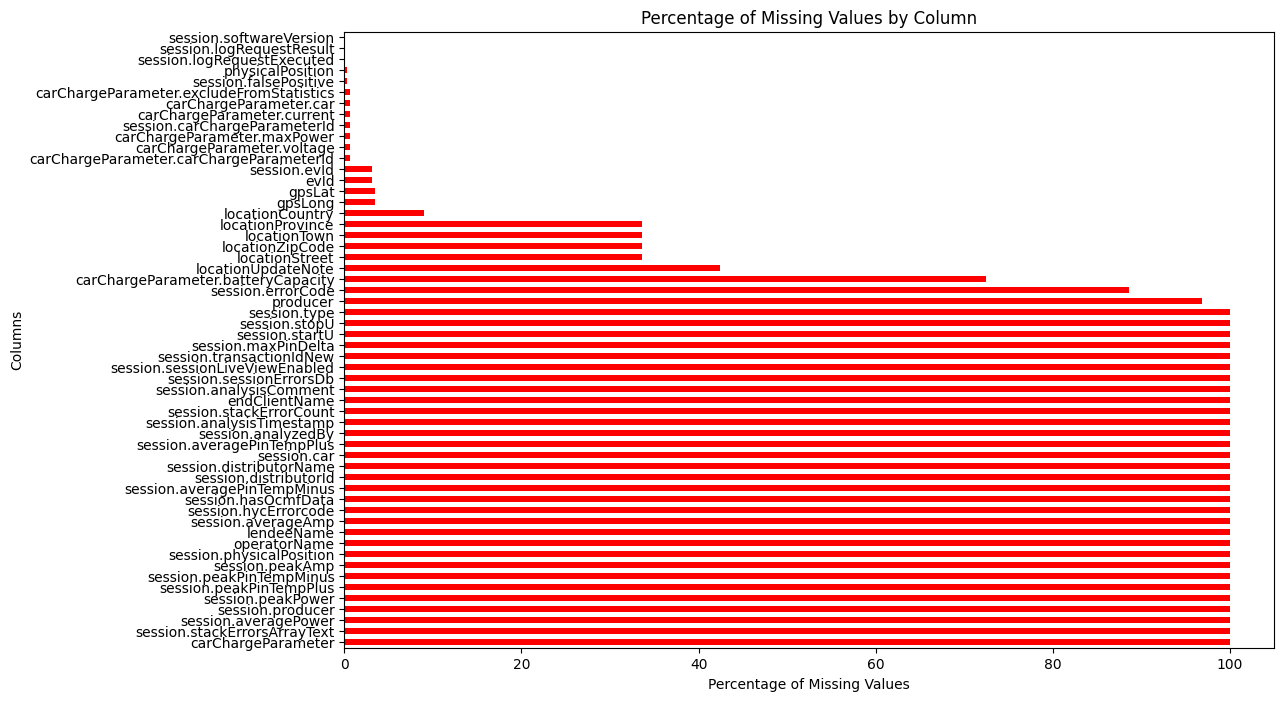

In [ ]:
# Calculate the percentage of missing values for each column
missing_percent = df.isnull().mean().sort_values(ascending=True) * 100

# Filter to display only columns with missing data
missing_percent = missing_percent[missing_percent > 0]

plt.figure(figsize=(12, 8))
missing_percent.plot(kind='barh', color='Red')
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Percentage of Missing Values by Column")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Drop columns with 100% missing values
df = df.dropna(axis=1, how='all')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13442 entries, 0 to 13441
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   serialNumber                              13442 non-null  object 
 1   gpsLat                                    12978 non-null  float64
 2   gpsLong                                   12978 non-null  float64
 3   locationStreet                            8931 non-null   object 
 4   locationZipCode                           8931 non-null   object 
 5   locationTown                              8931 non-null   object 
 6   locationProvince                          8931 non-null   object 
 7   locationCountry                           12235 non-null  object 
 8   locationUpdateNote                        7745 non-null   object 
 9   distributorName                           13442 non-null  object 
 10  corporationName                        

In [ ]:
df = df.astype(str)

# QUI SERVE IL TESTO PER GIUSTIFICARE IL DROPPING

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique().sum()

126262

In [ ]:
import pandas as pd
import numpy as np

# Replace any known missing value patterns with NaN before running the summary
df.replace(['', ' ', 'N/A', 'null', 'None', 'NaN', 'nan', '-'], np.nan, inplace=True)

def create_summary(file):
    dataframe = pd.DataFrame({
        'Variable Name': file.columns,
        'Number of Missing Values': [file[col].isna().sum() for col in file.columns],
        'Number of Unique Values': [file[col].nunique() for col in file.columns],
        'Data type': [file[col].dtype for col in file.columns]
    })
    return dataframe

# Re-run the summary after handling different missing value patterns
summary = create_summary(df)


<ipython-input-26-a28cbc255953>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['', ' ', 'N/A', 'null', 'None', 'NaN', 'nan', '-'], np.nan, inplace=True)


In [ ]:
display(summary)

,Variable Name,Number of Missing Values,Number of Unique Values,Data type
0,serialNumber,0,259,object
1,gpsLat,464,229,object
2,gpsLong,464,222,object
3,locationStreet,4511,75,object
4,locationZipCode,4511,59,object
5,locationTown,4511,72,object
6,locationProvince,4511,16,object
7,locationCountry,1207,1,object
8,locationUpdateNote,7294,30,object
9,distributorName,0,2,object


In [ ]:
# Dropping specified columns
df = df.drop(columns=['locationCountry', 'hasOcmfData', 'producer'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13442 entries, 0 to 13441
Data columns (total 45 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   serialNumber                              13442 non-null  object 
 1   gpsLat                                    12978 non-null  object 
 2   gpsLong                                   12978 non-null  object 
 3   locationStreet                            8931 non-null   object 
 4   locationZipCode                           8931 non-null   object 
 5   locationTown                              8931 non-null   object 
 6   locationProvince                          8931 non-null   object 
 7   locationUpdateNote                        6148 non-null   object 
 8   distributorName                           13442 non-null  object 
 9   corporationName                           13442 non-null  object 
 10  evId                                   

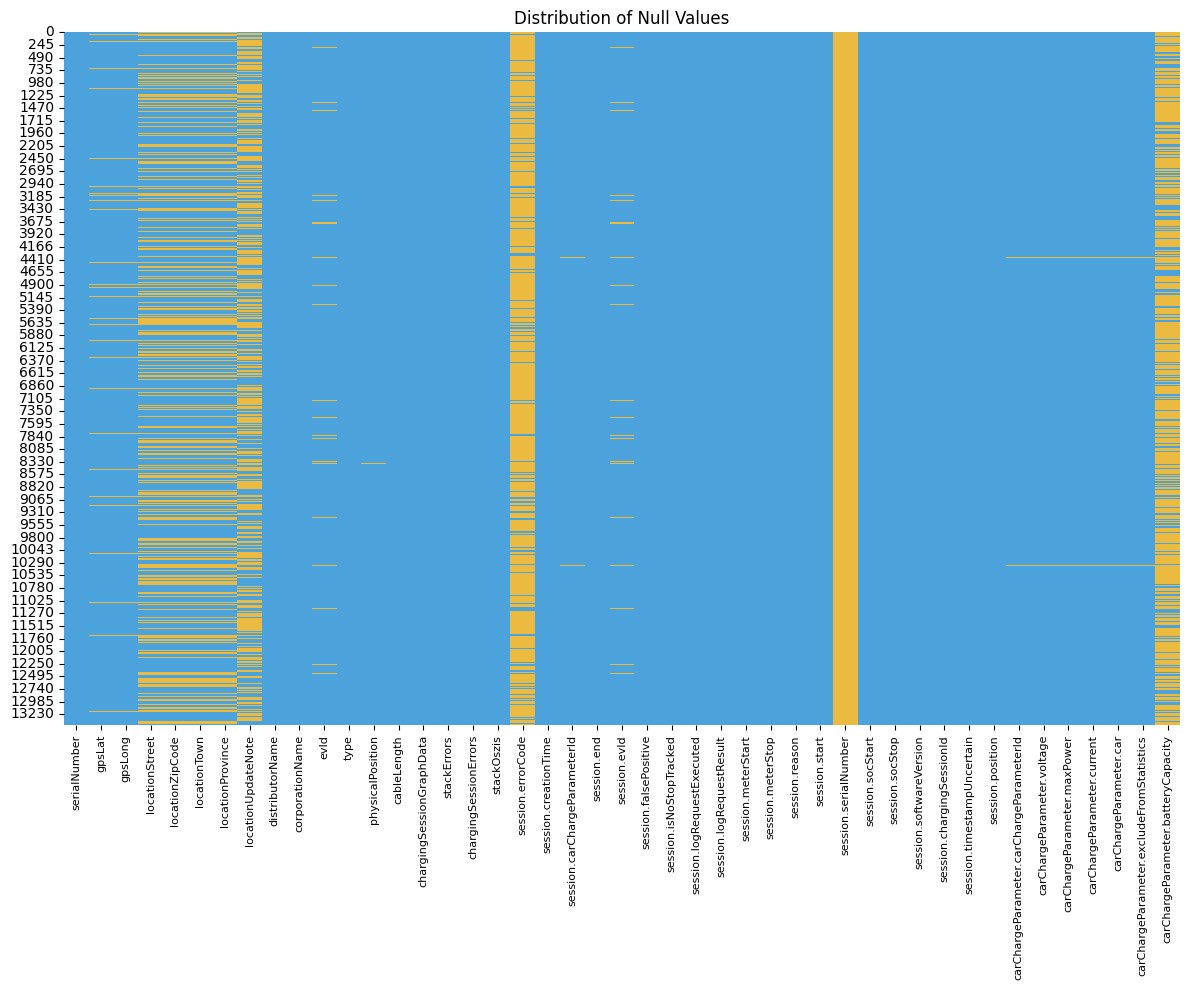

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

colors = ['#4CA3DB',"#EBBA41"]  # missing values, non-missing values
cmap = mcolors.ListedColormap(colors)

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.isnull(), cbar=False, cmap=cmap)
plt.title("Distribution of Null Values")
plt.xticks(fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session.serialNumber,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Display unique values in the distributorName column
print(df['distributorName'].unique())

['Free To X S.p.A.' 'Free To X Srl']


In [ ]:
print(df['corporationName'].unique())

['Free To X S.p.A.' 'Be charge Srl' 'Free To X Srl']


In [ ]:
# Replace 'Free To X Srl' with 'Free To X S.p.A.' in specified columns
df['distributorName'] = df['distributorName'].replace('Free To X Srl', 'Free To X S.p.A.')
df['corporationName'] = df['corporationName'].replace('Free To X Srl', 'Free To X S.p.A.')

# Display unique values in the distributorName column after replacement
print(df['distributorName'].unique())
print(df['corporationName'].unique())

['Free To X S.p.A.']
['Free To X S.p.A.' 'Be charge Srl']


In [ ]:
print(df['type'].unique())

['CCS2_400' 'AC_Cable' 'CHAdeMO']


In [ ]:
print(df['physicalPosition'].unique())

['4.0' '1.0' nan]


In [ ]:
print(df['cableLength'].unique())

['500' '0' '350']


In [ ]:
print(df['session.errorCode'].unique())

[nan 'OtherError' 'EVCommunicationError' 'ConnectorLockFailure'
 'GroundFailure']


In [ ]:
print(df['session.falsePositive'].unique())

['False' 'True' nan]


In [ ]:
print(df['session.isNoStopTracked'].unique())

['False']


In [ ]:
print(df['session.logRequestExecuted'].unique())

['True' nan 'False']


In [ ]:
print(df['session.reason'].unique())

['Local' 'Remote' 'HardReset' 'DeAuthorized' 'SoftReset']


In [ ]:
print(df['session.timestampUncertain'].unique())

['False']


In [ ]:
print(df['session.position'].unique())

['2' '1']


In [ ]:
print(df['carChargeParameter.excludeFromStatistics'].unique())

['False' nan 'True']


In [ ]:
print(df['carChargeParameter.batteryCapacity'].unique())

[nan '0.0' '50000.0' '79100.0' '42000.0' '23600.0' '153.0' '22800.0'
 '28000.0' '35500.0' '135000.0' '18700.0']


In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
display(df.sample(5))

,serialNumber,gpsLat,gpsLong,locationStreet,locationZipCode,locationTown,locationProvince,locationUpdateNote,distributorName,corporationName,evId,type,physicalPosition,cableLength,chargingSessionGraphData,stackErrors,chargingSessionErrors,stackOszis,session.errorCode,session.creationTime,session.carChargeParameterId,session.end,session.evId,session.falsePositive,session.isNoStopTracked,session.logRequestExecuted,session.logRequestResult,session.meterStart,session.meterStop,session.reason,session.start,session.serialNumber,session.socStart,session.socStop,session.softwareVersion,session.chargingSessionId,session.timestampUncertain,session.position,carChargeParameter.carChargeParameterId,carChargeParameter.voltage,carChargeParameter.maxPower,carChargeParameter.current,carChargeParameter.car,carChargeParameter.excludeFromStatistics,carChargeParameter.batteryCapacity
9602,24BZ4447D,19.0,-27.0,NaN,NaN,NaN,NaN,NaN,Free To X S.p.A.,Free To X S.p.A.,105344303779,CCS2_400,1.0,500,"[{'currentEv': 1.0, 'currentEvse': 0.2, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],NaN,2024-08-14T10:31:30.281676+00:00,125.0,2024-08-14T11:01:58+00:00,105344303779,False,False,True,Success,6007795,6027376,Local,2024-08-14T10:31:29+00:00,NaN,57,100,hyc_v2.0.0-MS2.1,74203567,False,1,125.0,480.0,100000.0,250.0,Opel eCorsa,False,50000.0
2582,22BZ0678B,41.25078,16.21886,Autostrada Adriatica 620,76123,Provincia di Barletta-Andria-Trani,Puglia,NaN,Free To X S.p.A.,Free To X S.p.A.,541065789268,CCS2_400,4.0,500,"[{'currentEv': 0.0, 'currentEvse': 0.0, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],NaN,2024-07-22T10:26:24.065546+00:00,7464.0,2024-07-22T11:19:13+00:00,541065789268,False,False,True,Success,30075350,30147042,Local,2024-07-22T10:26:22+00:00,NaN,8,98,hyc_v1.8.3,70533634,False,2,7464.0,408.0,0.0,500.0,Skoda Enyaq IV / VW ID.Buzz / Cupra Born / ID4...,False,NaN
755,23BZ1508B,44.4848,11.2583,NaN,NaN,NaN,NaN,CellTower localization!,Free To X S.p.A.,Free To X S.p.A.,79376146293196,CCS2_400,4.0,500,"[{'currentEv': 0.0, 'currentEvse': 0.1, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],NaN,2024-07-15T16:57:30.611883+00:00,7464.0,2024-07-15T17:25:18+00:00,79376146293196,False,False,True,Success,1726530,1782118,Local,2024-07-15T16:57:30+00:00,NaN,13,79,hyc_v1.7.3,69480144,False,2,7464.0,408.0,0.0,500.0,Skoda Enyaq IV / VW ID.Buzz / Cupra Born / ID4...,False,NaN
7702,23BZ1505B,45.517027,9.147218,NaN,NaN,NaN,NaN,CellTower localization!,Free To X S.p.A.,Free To X S.p.A.,105344208115,CCS2_400,1.0,500,"[{'currentEv': 1.0, 'currentEvse': 0.0, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],NaN,2024-08-07T16:08:18.280712+00:00,125.0,2024-08-07T16:26:37+00:00,105344208115,False,False,True,Success,25795788,25816408,Local,2024-08-07T16:08:17+00:00,NaN,23,71,hyc_v1.8.3,73161332,False,1,125.0,480.0,100000.0,250.0,Opel eCorsa,False,50000.0
11652,23BZ0050B,45.559134,9.039494,NaN,NaN,NaN,NaN,CellTower localization!,Free To X S.p.A.,Free To X S.p.A.,93428156303077,CCS2_400,4.0,500,"[{'currentEv': 0.0, 'currentEvse': 0.0, 'curre...",[],"[{'cause': 'loganalyze', 'chargingSessionError...",[],NaN,2024-08-21T03:41:35.599772+00:00,8422.0,2024-08-21T04:00:46+00:00,93428156303077,False,False,True,Success,11738555,11748610,Remote,2024-08-21T03:41:34+00:00,NaN,86,99,hyc_v1.8.3,75244324,False,2,8422.0,430.0,214000.0,499.0,Tesla,False,NaN


In [ ]:
# Convert specific columns to datetime format
datetime_columns = ['session.start', 'session.end', 'session.creationTime']
df[datetime_columns] = df[datetime_columns].apply(pd.to_datetime)

In [ ]:
# dropping battery capacity because there are a lot of null + not realistic data
df = df.drop(columns=['carChargeParameter.batteryCapacity'])

In [ ]:
print(df['locationProvince'].unique())

['Marche' 'Emilia-Romagna' 'Lazio' nan 'Lombardia' 'Umbria' 'Veneto'
 'Lombardy' 'Liguria' 'Piemonte' 'Friuli-Venezia Giulia' 'Campania'
 'Toscana' 'Piedmont' 'Puglia' 'Abruzzo' 'Apulia']


In [ ]:
# Replace inconsistent values in locationProvince column
df['locationProvince'].replace({
    'Lombardy': 'Lombardia',
    'Piedmont': 'Piemonte',
    'Apulia': 'Puglia'
}, inplace=True)

<ipython-input-52-0342a18802eb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['locationProvince'].replace({


In [ ]:
print(df['locationProvince'].unique())

['Marche' 'Emilia-Romagna' 'Lazio' nan 'Lombardia' 'Umbria' 'Veneto'
 'Liguria' 'Piemonte' 'Friuli-Venezia Giulia' 'Campania' 'Toscana'
 'Puglia' 'Abruzzo']


In [ ]:
print(df['locationTown'].unique())

['Provincia di Fermo' 'Bologna' 'Città Metropolitana di Roma' nan
 'Provincia di Como' 'Modena' 'Fabro' 'Provincia di Rovigo'
 'Città Metropolitana di Bologna' 'Casa Nuova' 'Roncadelle'
 'Province of Ferrara' 'Metropolitan City of Genoa' 'Bentivoglio'
 'Metropolitan City of Rome Capital' 'Milano' 'Novegro-Tregarezzo'
 'Provincia di Frosinone' 'Provincia di Alessandria'
 'Malborghetto Valbruna' 'San Nicola la Strada' 'Somaglia'
 'Province of Avellino' 'Città metropolitana di Roma Capitale'
 'Città Metropolitana di Firenze' 'Città Metropolitana di Milano'
 'Provincia di Treviso' 'Provincia di Arezzo' 'Province of Alessandria'
 'Attigliano' 'Arese' 'Ronco Scrivia' 'Savona' 'Province of Treviso'
 'San Giovanni Valdarno' 'Zona Industriale Artigianale'
 'Province of Varese' 'Santa Croce' 'Provincia di Modena' 'dir'
 'Provincia di Foggia' 'Avellino' 'Laghetto' 'Cascine Maggio' 'Riccione'
 'Province of Bergamo' 'Provincia di Barletta-Andria-Trani'
 'Area Produttiva Castello Bentivog' 'Savignan

In [ ]:
# Dictionary of suggested changes for `locationTown`
location_town_replacements = {
    'Province of Ferrara': 'Provincia di Ferrara',
    'Province of Treviso': 'Provincia di Treviso',
    'Province of Modena': 'Provincia di Modena',
    'Province of Bergamo': 'Provincia di Bergamo',
    'Province of Varese': 'Provincia di Varese',
    'Province of Avellino': 'Provincia di Avellino',
    'Province of Alessandria': 'Provincia di Alessandria',
    'Province of Teramo': 'Provincia di Teramo',
    'Province of Foggia': 'Provincia di Foggia',
    'Province of Monza and Brianza': 'Provincia di Monza e Brianza',
    'Metropolitan City of Rome Capital': 'Città Metropolitana di Roma Capitale',
    'Roma': 'Città Metropolitana di Roma Capitale',
    'Metropolitan City of Genoa': 'Città Metropolitana di Genova',
    'Metropolitan City of Milan': 'Città Metropolitana di Milano',
    'San Nicola la Strada': 'San Nicola La Strada',
    'Casa Nuova': 'Casanuova',
    'Area Produttiva Castello Bentivog': 'Area Produttiva Castello Bentivoglio',
    'Milano': 'Città Metropolitana di Milano'
}

# Replace the values in the `locationTown` column using the mapping
df['locationTown'].replace(location_town_replacements, inplace=True)

# Display unique values after replacements to confirm changes
print("Updated unique values for locationTown:")
print(df['locationTown'].unique())

Updated unique values for locationTown:
['Provincia di Fermo' 'Bologna' 'Città Metropolitana di Roma' nan
 'Provincia di Como' 'Modena' 'Fabro' 'Provincia di Rovigo'
 'Città Metropolitana di Bologna' 'Casanuova' 'Roncadelle'
 'Provincia di Ferrara' 'Città Metropolitana di Genova' 'Bentivoglio'
 'Città Metropolitana di Roma Capitale' 'Città Metropolitana di Milano'
 'Novegro-Tregarezzo' 'Provincia di Frosinone' 'Provincia di Alessandria'
 'Malborghetto Valbruna' 'San Nicola La Strada' 'Somaglia'
 'Provincia di Avellino' 'Città metropolitana di Roma Capitale'
 'Città Metropolitana di Firenze' 'Provincia di Treviso'
 'Provincia di Arezzo' 'Attigliano' 'Arese' 'Ronco Scrivia' 'Savona'
 'San Giovanni Valdarno' 'Zona Industriale Artigianale'
 'Provincia di Varese' 'Santa Croce' 'Provincia di Modena' 'dir'
 'Provincia di Foggia' 'Avellino' 'Laghetto' 'Cascine Maggio' 'Riccione'
 'Provincia di Bergamo' 'Provincia di Barletta-Andria-Trani'
 'Area Produttiva Castello Bentivoglio' 'Savignano sul 

<ipython-input-55-2689dafb6e27>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['locationTown'].replace(location_town_replacements, inplace=True)


In [ ]:
"""print(df['locationTown'].unique())"""

"print(df['locationTown'].unique())"

In [ ]:
"""print(df['locationStreet'].unique())"""

"print(df['locationStreet'].unique())"

In [ ]:
# Dictionary of suggested replacements for `locationStreet`
location_street_replacements = {
    'A13 Bologna - Padova ': 'Autostrada A13 Bologna - Padova',
    'A1, AdS Secchia Ovest 506 ': 'Autostrada A1 del Sole, AdS Secchia Ovest 506',
    'A1 331 ': 'Autostrada A1 del Sole, km 331',
    'A1 Km 01, Variante di Valico': 'Autostrada A1 del sole, km 01, Variante di Valico',
    'Autostrada del Sole 1 ': 'Autostrada A1 del Sole',
    'Autostrada del Sole 427 ': 'Autostrada A1 del Sole, km 427',
    'Autostrada del Sole 481 ': 'Autostrada A1 del Sole, km 481',
    'Autostrada dei Laghi km 9 ': 'Autostrada A8 dei Laghi, km 9',
    'Autostrada dei Laghi km 29 ': 'Autostrada A8 dei Laghi, km 29',
    'Autostrada dei Due Mari A16 ': 'Autostrada A16 dei Due Mari',
    ' Area di servizio flaminia est autostrada 1 ': 'Area di servizio Flaminia Est, Autostrada A1 del Sole',
    ' Via Santa Monica ': 'Via Santa Monica, Rome',
    'Area di Servizio Calaggio Sud, Autostrada dei Due Mari': 'Area di Servizio Calaggio Sud, Autostrada A16 dei Due Mari',
    'Free To X San Zenone Ovest': 'Area di Servizio San Zenone Ovest, Autostrada A1 del Sole',
    "Autostrada d'Alemagna ": 'Autostrada A27 Alemagna',
    'Autostrada Adriatica ': 'Autostrada A14 Adriatica',
    'Autostrada Azzurra ': 'Autostrada A12 Azzurra',
    'via Madonnina 2101 ': 'Via Madonnina, 2101',
    'Via Mollaia 5472 ': 'Via Mollaia, 5472',
    'Via Pietro Nenni 10 ': 'Via Pietro Nenni, 10',
    'area di servizio flaminia est autostrada 1': 'Area di servizio Flaminia Est, Autostrada A1 del Sole',
    'Via Antonio Annarumma 35 ': 'Via Antonio Annarumma, 35',
    'Strada Tre Olmi 19 ': 'Strada Tre Olmi, 19',
    'Via Autostrada del Sole 1 ': 'Autostrada A1 del Sole',
    'Viale Enrico Forlanini 1 ' : 'Viale Enrico Forlanini, 1',
    'Autostrada dei Laghi ' : 'Autostrada A8 dei Laghi',
    'Autostrada del Sole ' : 'Autostrada A1 del Sole',
    'Autostrada A1 del Sole, km 1' : 'Autostrada A1 del Sole',
    'Autostrada del Sole km 1' : 'Autostrada A1 del Sole',
    'via Sammarina 71 ' : 'Via Sammarina, 71',
    'A1 ' : 'Autostrada A1 del Sole',
    'Via Caravaggio 1 ' : 'Via Caravaggio, 1',
    'Contrada Colle Stella 21 ' : 'Contrada Colle Stella, 21',
}

# Replace values in the `locationStreet` column using the mapping
df['locationStreet'].replace(location_street_replacements, inplace=True)

# Display unique values after replacements to confirm changes
print("Updated unique values for locationStreet:")
print(df['locationStreet'].unique())

<ipython-input-58-cd2cb88b90e8>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['locationStreet'].replace(location_street_replacements, inplace=True)


Updated unique values for locationStreet:
['Autostrada Adriatica 290 ' 'Autostrada Adriatica 741 '
 'Area di servizio Prenestina est' nan 'Autostrada A8 dei Laghi, km 29'
 'Autostrada A1 del Sole' 'Autostrada A1 del Sole, km 427'
 'A13 Bologna - Padova km 65 ' 'Via Madonnina, 2101' 'A1, Arda Est 37 '
 'A4, AdS Valtrompia Nord ' 'Autostrada A13 Bologna - Padova'
 'A12 Autostrada Azzurra ' 'Via Sammarina, 71' 'Autostrada A12 Azzurra'
 'Viale Enrico Forlanini, 1' 'Aeroporto di Milano Linate '
 'Strada Comunale Bruciata 332 '
 'A23 Autostrada Palmanova-Tarvisio KM 97 ' 'Via Enrico Fermi 20b '
 'Strada Tre Olmi, 19' 'Autostrada dei Due Mari '
 'Località Prulli di Sotto 105 '
 'Area di Servizio San Zenone Ovest, Autostrada A1 del Sole'
 'Autostrada A27 Alemagna' 'Via della Palazzina 38 '
 'Autostrada Firenze-Mare ' 'A26 - Autostrada dei Trafori '
 'Autostrada A1 del Sole, km 481' 'Autostrada A8 dei Laghi, km 9'
 'Autostrada dei Giovi A7 ' 'Via Caravaggio, 1'
 'Area di Servizio Sile Ovest ' '

In [ ]:
"""display(df.sample(5))"""

'display(df.sample(5))'

In [ ]:
"""df.info()"""

'df.info()'

In [ ]:
df['chargingSessionErrors'][0]

"[{'cause': 'loganalyze', 'chargingSessionErrorsId': 0, 'chargingSessionId': 69206115, 'dateTime': '2024-07-14T06:26:31.833+00:00', 'errorCode': None, 'hycErrorCode': 'PostAnalysis_User_stop_charger_button', 'isPrivate': True}\n {'cause': 'loganalyze', 'chargingSessionErrorsId': 0, 'chargingSessionId': 69206115, 'dateTime': '2024-07-14T06:26:33.372+00:00', 'errorCode': None, 'hycErrorCode': 'PostAnalysis_user_stop_ev_side', 'isPrivate': True}\n {'cause': 'loganalyze', 'chargingSessionErrorsId': 0, 'chargingSessionId': 69206115, 'dateTime': '2024-07-14T06:26:34.302+00:00', 'errorCode': None, 'hycErrorCode': 'PostAnalysis_EV_stop_during_init', 'isPrivate': True}]"

In [ ]:
"""# Explode the 'chargingSessionGraphData' column into separate rows
exploded_df = df[['chargingSessionGraphData']].explode('chargingSessionGraphData')

# Normalize the dictionaries inside each row to create a structured DataFrame
expanded_chargingSessionGraphData = pd.json_normalize(exploded_df['chargingSessionGraphData'])

# Save the resulting dataset to a CSV file
expanded_chargingSessionGraphData.to_csv('expanded_chargingSessionGraphData.csv', index=False)

# Display a confirmation message
print("Dataset saved as 'expanded_chargingSessionGraphData.csv'.")"""

'# Explode the \'chargingSessionGraphData\' column into separate rows\nexploded_df = df[[\'chargingSessionGraphData\']].explode(\'chargingSessionGraphData\')\n\n# Normalize the dictionaries inside each row to create a structured DataFrame\nexpanded_chargingSessionGraphData = pd.json_normalize(exploded_df[\'chargingSessionGraphData\'])\n\n# Save the resulting dataset to a CSV file\nexpanded_chargingSessionGraphData.to_csv(\'expanded_chargingSessionGraphData.csv\', index=False)\n\n# Display a confirmation message\nprint("Dataset saved as \'expanded_chargingSessionGraphData.csv\'.")'

In [ ]:
"""# Explode the 'chargingSessionErrors' column into separate rows
exploded_df = df[['chargingSessionErrors']].explode('chargingSessionErrors')

# Normalize the dictionaries inside each row to create a structured DataFrame
expanded_chargingSessionErrors = pd.json_normalize(exploded_df['chargingSessionErrors'])

# Save the resulting dataset to a CSV file
expanded_chargingSessionErrors.to_csv('expanded_chargingSessionErrors.csv', index=False)

# Display a confirmation message
print("Dataset saved as 'expanded_chargingSessionErrors.csv'.")"""

'# Explode the \'chargingSessionErrors\' column into separate rows\nexploded_df = df[[\'chargingSessionErrors\']].explode(\'chargingSessionErrors\')\n\n# Normalize the dictionaries inside each row to create a structured DataFrame\nexpanded_chargingSessionErrors = pd.json_normalize(exploded_df[\'chargingSessionErrors\'])\n\n# Save the resulting dataset to a CSV file\nexpanded_chargingSessionErrors.to_csv(\'expanded_chargingSessionErrors.csv\', index=False)\n\n# Display a confirmation message\nprint("Dataset saved as \'expanded_chargingSessionErrors.csv\'.")'

In [ ]:
"""# Explode the 'stackErrors' column into separate rows
exploded_df = df[['stackErrors']].explode('stackErrors')

# Normalize the dictionaries inside each row to create a structured DataFrame
expanded_stackErrors = pd.json_normalize(exploded_df['stackErrors'])

# Save the resulting dataset to a CSV file
expanded_stackErrors.to_csv('expanded_stackErrors.csv', index=False)

# Display a confirmation message
print("Dataset saved as 'expanded_stackErrors.csv'.")"""

'# Explode the \'stackErrors\' column into separate rows\nexploded_df = df[[\'stackErrors\']].explode(\'stackErrors\')\n\n# Normalize the dictionaries inside each row to create a structured DataFrame\nexpanded_stackErrors = pd.json_normalize(exploded_df[\'stackErrors\'])\n\n# Save the resulting dataset to a CSV file\nexpanded_stackErrors.to_csv(\'expanded_stackErrors.csv\', index=False)\n\n# Display a confirmation message\nprint("Dataset saved as \'expanded_stackErrors.csv\'.")'

In [ ]:
"""# Explode the 'stackOszis' column into separate rows
exploded_df = df[['stackOszis']].explode('stackOszis')

# Normalize the dictionaries inside each row to create a structured DataFrame
expanded_stackOszis = pd.json_normalize(exploded_df['stackOszis'])

# Save the resulting dataset to a CSV file
expanded_stackOszis.to_csv('expanded_stackOszis.csv', index=False)

# Display a confirmation message
print("Dataset saved as 'expanded_stackOszis.csv'.")"""

'# Explode the \'stackOszis\' column into separate rows\nexploded_df = df[[\'stackOszis\']].explode(\'stackOszis\')\n\n# Normalize the dictionaries inside each row to create a structured DataFrame\nexpanded_stackOszis = pd.json_normalize(exploded_df[\'stackOszis\'])\n\n# Save the resulting dataset to a CSV file\nexpanded_stackOszis.to_csv(\'expanded_stackOszis.csv\', index=False)\n\n# Display a confirmation message\nprint("Dataset saved as \'expanded_stackOszis.csv\'.")'

In [ ]:
df_loc = pd.read_csv('/content/drive/MyDrive/hypercarge_locations.csv')

In [ ]:
df_merged = pd.merge(df, df_loc, on='serialNumber', how='outer')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13557 entries, 0 to 13556
Columns: 152 entries, serialNumber to lendeeName_y
dtypes: bool(20), float64(33), int64(7), object(92)
memory usage: 13.9+ MB


In [ ]:
display(df_merged.sample(5))

,serialNumber,gpsLat_x,gpsLong_x,locationStreet_x,locationZipCode_x,locationTown_x,locationProvince_x,locationCountry_x,locationUpdateNote_x,endClientName_x,...,corporationName_y,operatorName_y,hasVollmacht,hasCommissioningProtocol,surroundingChargers,isFavourite,sessionLiveViewEnabled,finishedEol,lendeeId,lendeeName_y
3356,22BZ5328B,41.686013,13.187509,A1,03012,Provincia di Frosinone,Lazio,Italy,,None,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6771, 'gpsLat': 42.49917, 'gpsL...",False,False,True,NaN,NaN
9126,22BZ3011B,45.676823,12.172375,None,None,None,None,Italy,CellTower localization!,None,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 8936, 'gpsLat': 44.88013, 'gpsL...",False,False,True,NaN,NaN
7141,22BZ6978B,44.621643,11.420397,via Sammarina 71,40010,Bentivoglio,Emilia-Romagna,Italy,None,None,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6772, 'gpsLat': 44.66244, 'gpsL...",False,False,True,NaN,NaN
10563,22BZ0681B,41.908903,15.168512,Autostrada Adriatica,71010,Provincia di Foggia,Puglia,Italy,Sarni Torre Fantine Ovest,None,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 8109, 'gpsLat': 41.04907, 'gpsL...",False,False,True,NaN,NaN
11450,22BZ0658B,45.729051,9.028446,Autostrada dei Laghi km 29,22071,Provincia di Como,Lombardia,Italy,CellTower localization!,None,...,Free To X S.p.A.,NaN,False,False,"[{'chargerId': 6726, 'gpsLat': 45.321817499999...",False,False,True,NaN,NaN


In [ ]:
df_merged.to_csv('merged_dataset.csv', index=False)

In [ ]:
# Reason to merge
shared_columns = set(df.columns).intersection(set(df_loc.columns))

print("HyperCharge Locations and HyperCharge Session share", len(shared_columns), "columns")
print("Shared columns between HYC sessions and HYC locations:",(shared_columns))

HyperCharge Locations and HyperCharge Session share 14 columns
Shared columns between HYC sessions and HYC locations: {'locationZipCode', 'serialNumber', 'distributorName', 'endClientName', 'locationUpdateNote', 'gpsLat', 'locationCountry', 'lendeeName', 'gpsLong', 'corporationName', 'locationTown', 'locationProvince', 'operatorName', 'locationStreet'}


In [ ]:
print(len(shared_columns))

14
